<a href="https://colab.research.google.com/github/vf-fontes/intro-cd/blob/master/20200930_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install gitly

In [11]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')


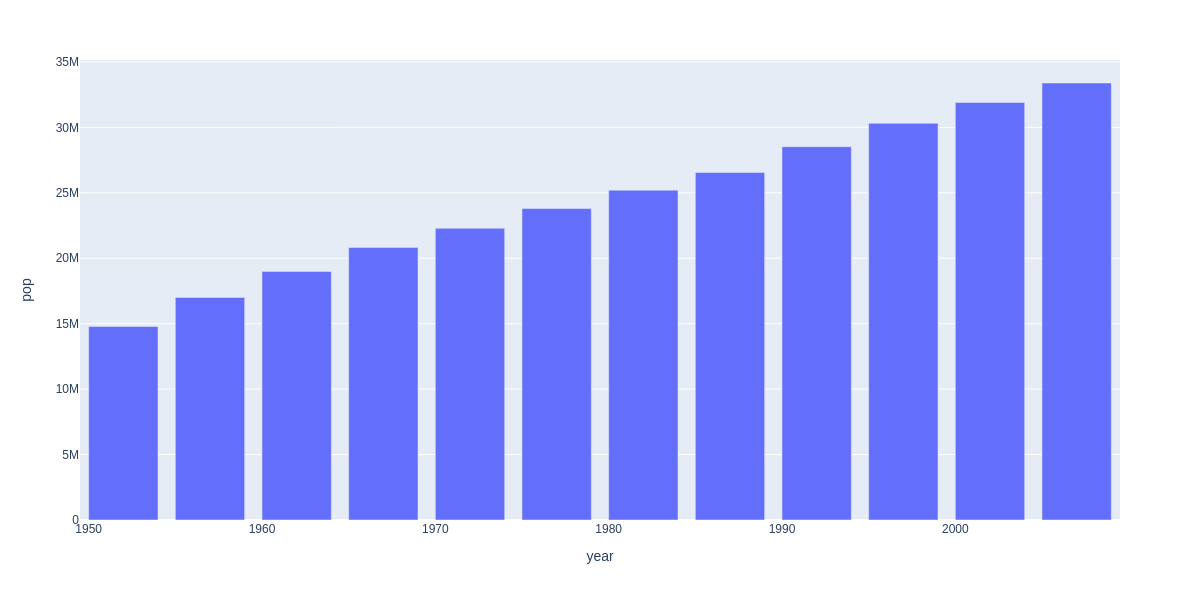

In [13]:
import plotly.express as px

data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
gitly.show( fig, width=1200, height=600 )